# Data Science and Business Analytics

# Task1: Prediction using supervised ML model( Linear regression)

The Sparks Foundation

AUTHOR: GANESH KAILAS YEVLE

BATCH: GRIPJULY2022

**Perform exploratory Data Analysis on dataset "Students" to predict the percentage of the marks of the students based on the number of hours they studied.**

In [6]:
# importing the required liabraries
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics


In [7]:
#Reading the data 
sdata=pd.read_csv('http://bit.ly/w-data')
sdata.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
#checking whether there is any null value then the output is TRUE
if sdata.isnull== True:
    print("OUTPUT : There is any null value the given dataset print print True")
else:
    print("OUTPUT : There is no any null value in the given dataset print False")

OUTPUT : There is no any null value in the given dataset print False


**There is no null value in the dataset**

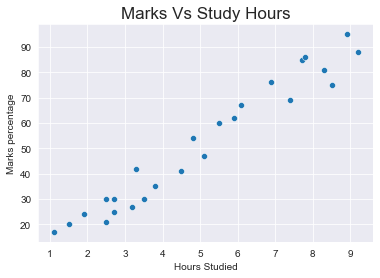

In [9]:
sns.set_style('darkgrid')
sns.scatterplot(y=sdata['Scores'], x=sdata['Hours'])
plt.title('Marks Vs Study Hours', size=17)
plt.xlabel('Hours Studied', size=10)
plt.ylabel('Marks percentage',size=10)
plt.show()

In [11]:
sdata.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Maximum And Minimum Hours or Scores in the given dataset is:**


In [20]:
print(sdata.max(),sdata.min())

Hours      9.2
Scores    95.0
dtype: float64 Hours      1.1
Scores    17.0
dtype: float64


In [15]:
#Shape of the dataset
sdata.shape

(25, 2)

In [16]:
#Info of the dataset
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [17]:
#Datatypes
sdata.dtypes

Hours     float64
Scores      int64
dtype: object

In [18]:
#Attributes
sdata.columns

Index(['Hours', 'Scores'], dtype='object')

In [19]:
#Checking for duplicated values
sdata.duplicated().sum()

0

In [21]:
#Checking for null values
sdata.isnull().sum()

Hours     0
Scores    0
dtype: int64

**From the above scatter plot, we can clearly see that there is a positive correlation between the hours of study and the marks percentage**

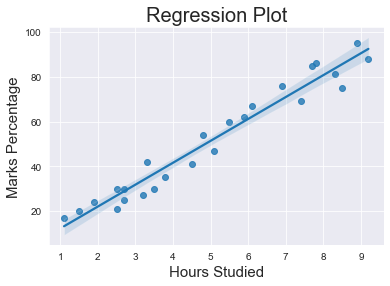

In [15]:
sns.regplot(x=sdata['Hours'],y=sdata['Scores'])
plt.title('Regression Plot', size=20)
plt.xlabel('Hours Studied',size=15)
plt.ylabel('Marks Percentage',size=15)
plt.show()

**This graph depicts that the hours studied and marks percentage is positively correlated** 

**Preparing the Data**

**1) Splitting the Data** 

In [16]:
#Defining x and y from the Data
X = sdata.iloc[:, :-1].values  
Y = sdata.iloc[:, 1].values 

In [17]:
#splitting the data in two 
train_X,test_X, train_Y,test_Y = train_test_split(X,Y,test_size=0.2, random_state=0) 

**2)Fitting the Data into the model**

In [19]:
regression=LinearRegression()
regression.fit(train_X,train_Y)


LinearRegression()

**Predicting the percentage of marks**

In [20]:
pred_y=regression.predict(test_X)
prediction= pd.DataFrame({'Hours':[i[0] for i in test_X],'Predicted Marks':[k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [21]:
print(test_Y)

[20 27 69 30 62]


**Comapring the Data with the predicted marks**

In [22]:
scores_comparing=pd.DataFrame({'Actual Marks':test_Y,'Predicted Marks': pred_y})
scores_comparing

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Visually comparing the Predicted Marks with Actual Marks**

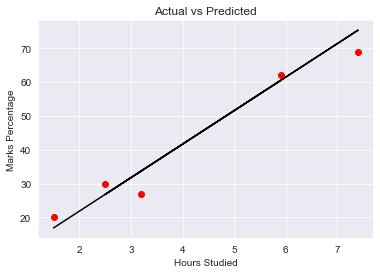

In [23]:
plt.scatter(x=test_X,y=test_Y,color="red")
plt.plot(test_X,pred_y,color="black")
plt.title('Actual vs Predicted')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Percentage')
plt.show()

**Evaluating the Method**

In [24]:
#Calculating the accuracy by mean absolute model
print('Mean absolute error: ',mean_absolute_error(test_Y,pred_y))

Mean absolute error:  4.183859899002975


**The small figure shows that the chances of error or wrong forecasting through the model are less.**

**What will be the predicted score of a student if he/she studies for 9.25hrs/day?**

In [25]:
hours=[9.25]
sol=regression.predict([hours])
print('Score={}'.format(round(sol[0],3)))

Score=93.692


**According to the regression model if a student studies 9.25 hrs/day he/she is likely to score 93.692 marks**